# Using Machine Learning Tools 2023, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

# 10%: Loading, investigating, manipulating and displaying data

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

2023-08-17 19:16:11.437138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# loading the training data (X+y)
train_df = pd.read_csv('sign_mnist_train.csv')

# Removing the row with the label 200
train_df = train_df[train_df['label'] != 200]

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27454, 784), (27454,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27454, 28, 28, 1]), (27454, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x13c8ebe10>,
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]))

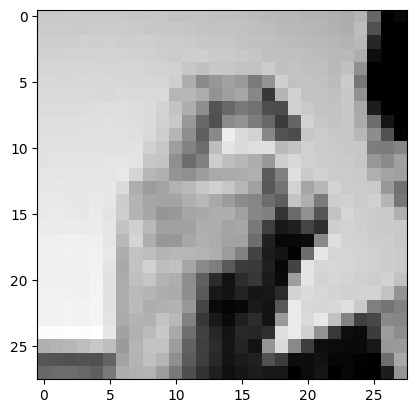

In [15]:
plt.imshow(X[1], cmap='gray'), y[0]

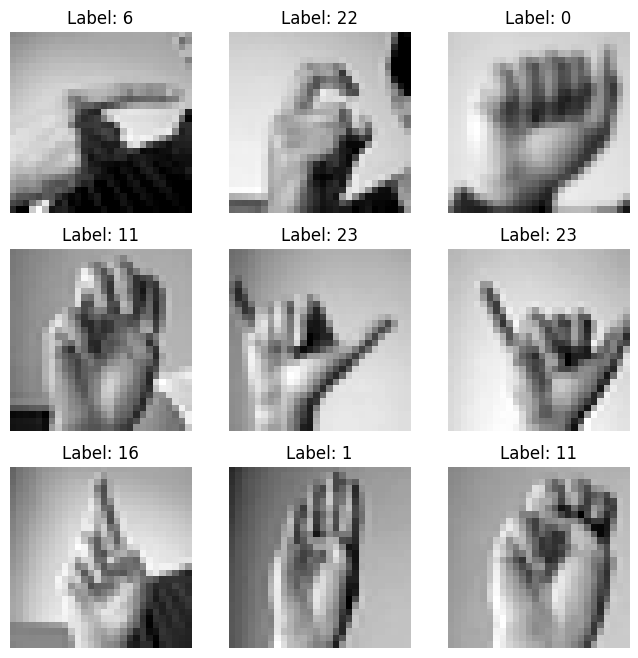

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(tf.squeeze(X[i]), cmap='gray')
    ax.set_title(f"Label: {y[i].argmax()}")
    ax.axis('off')
plt.show()

In [17]:
train_df.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,...,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000
mean,12.318533,145.420267,148.501129,151.248525,153.547316,156.211700,158.412035,160.472937,162.340460,163.955526,...,141.107234,147.495665,153.324179,159.124135,161.968092,162.735558,162.904968,161.965251,161.136665,159.823450
std,7.287537,41.359046,39.942628,39.056766,38.595731,37.111598,36.126006,35.016790,33.662365,32.651980,...,63.751144,65.514087,64.428021,63.709358,63.739183,63.444883,63.510071,63.299560,63.611245,64.397669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.250000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


 # 20%: Initial model successfully trained (and acting as a baseline)

In [18]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20


781/782 [============================>.] - ETA: 0s - loss: 0.7046 - accuracy: 0.7846INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 34s 42ms/step - loss: 0.7044 - accuracy: 0.7846 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 2/20
780/782 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 33s 42ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 6.0890e-04 - val_accuracy: 1.0000
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 3.7089e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 32s 41ms/step - loss: 3.7089e-04 - accuracy: 1.0000 - val_loss: 2.3209e-04 - val_accuracy: 1.0000
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 1.5382e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 32s 41ms/step - loss: 1.5382e-04 - accuracy: 1.0000 - val_loss: 1.1754e-04 - val_accuracy: 1.0000
Epoch 5/20
781/782 [============================>.] - ETA: 0s - loss: 8.2255e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 32s 41ms/step - loss: 8.2270e-05 - accuracy: 1.0000 - val_loss: 6.0095e-05 - val_accuracy: 1.0000
Epoch 6/20
782/782 [==============================] - ETA: 0s - loss: 4.6379e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 33s 43ms/step - loss: 4.6379e-05 - accuracy: 1.0000 - val_loss: 3.8260e-05 - val_accuracy: 1.0000
Epoch 7/20
781/782 [============================>.] - ETA: 0s - loss: 2.7587e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 36s 46ms/step - loss: 2.7589e-05 - accuracy: 1.0000 - val_loss: 2.2953e-05 - val_accuracy: 1.0000
Epoch 8/20
781/782 [============================>.] - ETA: 0s - loss: 1.6300e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 35s 45ms/step - loss: 1.6296e-05 - accuracy: 1.0000 - val_loss: 1.5732e-05 - val_accuracy: 1.0000
Epoch 9/20
781/782 [============================>.] - ETA: 0s - loss: 9.1898e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 36s 45ms/step - loss: 9.1884e-06 - accuracy: 1.0000 - val_loss: 9.6064e-06 - val_accuracy: 1.0000
Epoch 10/20
782/782 [==============================] - ETA: 0s - loss: 5.4429e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 35s 45ms/step - loss: 5.4429e-06 - accuracy: 1.0000 - val_loss: 5.1104e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 3.3711e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 35s 44ms/step - loss: 3.3709e-06 - accuracy: 1.0000 - val_loss: 3.2336e-06 - val_accuracy: 1.0000
Epoch 12/20
782/782 [==============================] - ETA: 0s - loss: 2.1540e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 36s 45ms/step - loss: 2.1540e-06 - accuracy: 1.0000 - val_loss: 2.1546e-06 - val_accuracy: 1.0000
Epoch 13/20
782/782 [==============================] - 35s 45ms/step - loss: 1.2802e-06 - accuracy: 1.0000 - val_loss: 2.3008e-06 - val_accuracy: 1.0000
Epoch 14/20
782/782 [==============================] - 34s 44ms/step - loss: 0.0854 - accuracy: 0.9784 - val_loss: 3.5172e-04 - val_accuracy: 1.0000
Epoch 15/20
782/782 [==============================] - 36s 45ms/step - loss: 2.0148e-04 - accuracy: 1.0000 - val_loss: 1.3465e-04 - val_accuracy: 1.0000
Epoch 16/20
782/782 [==============================] - 35s 45ms/step - loss: 9.0976e-05 - accuracy: 1.0000 - val_loss: 6.9594e-05 - val_accuracy: 1.0000
Epoch 17/20
782/782 [==============================] - 35s 45ms/step - loss: 5.0039e-05 - accuracy: 1.0000 - val_loss: 3.9365e-05 - val_accuracy: 1.0000


In [23]:
history.history # Contains the training related information for each epoch

{'loss': [0.704374372959137,
  0.003444432746618986,
  0.00037089144461788237,
  0.00015381982666440308,
  8.227018406614661e-05,
  4.637883830582723e-05,
  2.7588985176407732e-05,
  1.6296058674925007e-05,
  9.18843306862982e-06,
  5.442915608000476e-06,
  3.370857257323223e-06,
  2.1539892713917652e-06,
  1.2802478295270703e-06,
  0.08540958166122437,
  0.00020148181647527963,
  9.097588190343231e-05,
  5.003947808290832e-05],
 'accuracy': [0.7846400141716003,
  0.9998000264167786,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.97843998670578,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.031369805335998535,
  0.0006089008529670537,
  0.00023209047503769398,
  0.00011753720173146576,
  6.0094833315815777e-05,
  3.8259971915977076e-05,
  2.2953459847485647e-05,
  1.573174085933715e-05,
  9.606362254999112e-06,
  5.110434358357452e-06,
  3.2336365620722063e-06,
  2.154574076485005e-06,
  2.3007773961580824e-06,
  0.0003517248260322958,
  0.00013465418305713683

In [24]:
h = history.history

 7/77 [=>............................] - ETA: 0s - loss: 3.8477e-05 - accuracy: 1.0000

77/77 [==============================] - 1s 8ms/step - loss: 3.9365e-05 - accuracy: 1.0000
Validation Accuracy: 100.00%


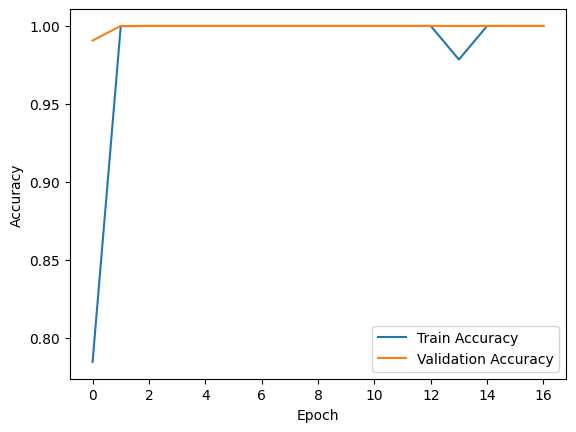

In [25]:
valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid)
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

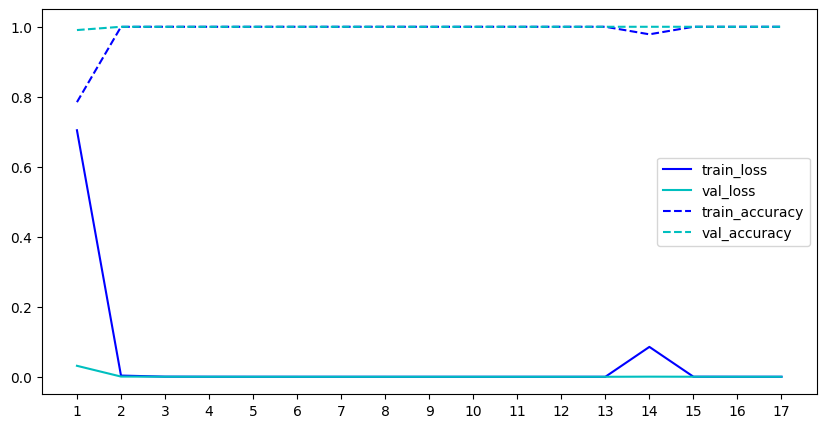

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

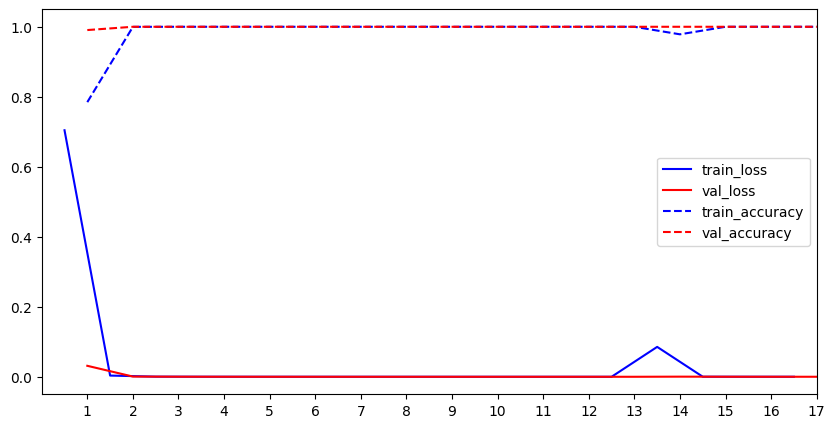

In [28]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [29]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

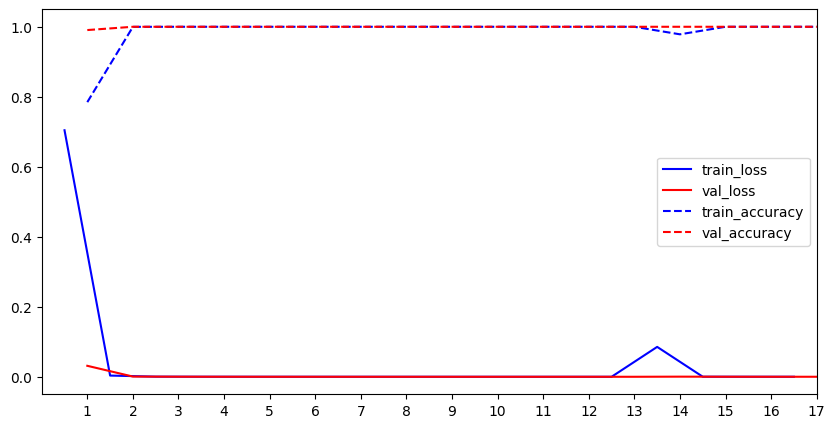

In [30]:
get_train_val_plots(h)

In [31]:
test_df = pd.read_csv('sign_mnist_test.csv') # Load the test data

In [32]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [33]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [34]:
y_test = label_binarizer.transform(y_test)

In [35]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 8ms/step - loss: 87.7533 - accuracy: 0.9289


[87.75325775146484, 0.9288901090621948]

Accuracy: 92%

In [36]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [37]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 2s 7ms/step - loss: 87.7533 - accuracy: 0.9289
Loss: 87.753 Accuracy: 0.929


 # 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)

In [38]:
#Convolution and Max Pooling Pairs

#1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
#2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
#3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
#4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [39]:
n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
607/610 [============================>.] - ETA: 0s - loss: 1.2894 - accuracy: 0.6360INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 10s 15ms/step - loss: 1.2856 - accuracy: 0.6370 - val_loss: 0.3885 - val_accuracy: 0.8904
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9580INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 14ms/step - loss: 0.1942 - accuracy: 0.9580 - val_loss: 0.0740 - val_accuracy: 0.9962
Epoch 3/15
607/610 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9978INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0422 - accuracy: 0.9978 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 4/15
607/610 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0135 - accuracy: 0.9998 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 5/15
606/610 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/15
606/610 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 14ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9999
Epoch 7/15
607/610 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 14ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/15
610/610 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 14ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 7.4314e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 14ms/step - loss: 7.4311e-04 - accuracy: 1.0000 - val_loss: 7.4378e-04 - val_accuracy: 1.0000
Epoch 10/15
610/610 [==============================] - 9s 14ms/step - loss: 0.0288 - accuracy: 0.9923 - val_loss: 9.9583e-04 - val_accuracy: 1.0000
Epoch 11/15
607/610 [============================>.] - ETA: 0s - loss: 6.3610e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 15ms/step - loss: 6.3540e-04 - accuracy: 1.0000 - val_loss: 6.2494e-04 - val_accuracy: 1.0000
Epoch 12/15
608/610 [============================>.] - ETA: 0s - loss: 4.2192e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 15ms/step - loss: 4.2155e-04 - accuracy: 1.0000 - val_loss: 4.5273e-04 - val_accuracy: 1.0000
Epoch 13/15
606/610 [============================>.] - ETA: 0s - loss: 3.1237e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 15ms/step - loss: 3.1291e-04 - accuracy: 1.0000 - val_loss: 3.9786e-04 - val_accuracy: 1.0000
Epoch 14/15
606/610 [============================>.] - ETA: 0s - loss: 2.3591e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 15ms/step - loss: 2.3638e-04 - accuracy: 1.0000 - val_loss: 2.9853e-04 - val_accuracy: 1.0000
Epoch 15/15
609/610 [============================>.] - ETA: 0s - loss: 1.7796e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 9s 15ms/step - loss: 1.7792e-04 - accuracy: 1.0000 - val_loss: 2.0171e-04 - val_accuracy: 1.0000
Epoch 1/15
609/610 [============================>.] - ETA: 0s - loss: 0.9219 - accuracy: 0.7243INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 38ms/step - loss: 0.9214 - accuracy: 0.7245 - val_loss: 0.0843 - val_accuracy: 0.9833
Epoch 2/15
610/610 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9967INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 23s 38ms/step - loss: 0.0250 - accuracy: 0.9967 - val_loss: 0.0044 - val_accuracy: 0.9999
Epoch 3/15
610/610 [==============================] - 23s 38ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0084 - val_accuracy: 0.9989
Epoch 4/15
610/610 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9964INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 40ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 5.1144e-04 - val_accuracy: 1.0000
Epoch 5/15
610/610 [==============================] - ETA: 0s - loss: 3.2755e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 39ms/step - loss: 3.2755e-04 - accuracy: 1.0000 - val_loss: 2.5468e-04 - val_accuracy: 1.0000
Epoch 6/15
609/610 [============================>.] - ETA: 0s - loss: 1.7792e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 39ms/step - loss: 1.7785e-04 - accuracy: 1.0000 - val_loss: 1.5344e-04 - val_accuracy: 1.0000
Epoch 7/15
609/610 [============================>.] - ETA: 0s - loss: 1.1233e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 39ms/step - loss: 1.1230e-04 - accuracy: 1.0000 - val_loss: 1.0703e-04 - val_accuracy: 1.0000
Epoch 8/15
610/610 [==============================] - ETA: 0s - loss: 7.4415e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 24s 39ms/step - loss: 7.4415e-05 - accuracy: 1.0000 - val_loss: 7.1887e-05 - val_accuracy: 1.0000
Epoch 9/15
608/610 [============================>.] - ETA: 0s - loss: 5.1810e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 5.1761e-05 - accuracy: 1.0000 - val_loss: 5.0760e-05 - val_accuracy: 1.0000
Epoch 10/15
608/610 [============================>.] - ETA: 0s - loss: 3.5758e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 3.5693e-05 - accuracy: 1.0000 - val_loss: 3.7486e-05 - val_accuracy: 1.0000
Epoch 11/15
608/610 [============================>.] - ETA: 0s - loss: 2.4854e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 2.4832e-05 - accuracy: 1.0000 - val_loss: 2.9119e-05 - val_accuracy: 1.0000
Epoch 12/15
610/610 [==============================] - ETA: 0s - loss: 1.7727e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 1.7727e-05 - accuracy: 1.0000 - val_loss: 2.0351e-05 - val_accuracy: 1.0000
Epoch 13/15
609/610 [============================>.] - ETA: 0s - loss: 1.2590e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 23s 37ms/step - loss: 1.2587e-05 - accuracy: 1.0000 - val_loss: 1.4179e-05 - val_accuracy: 1.0000
Epoch 14/15
608/610 [============================>.] - ETA: 0s - loss: 8.7683e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 8.7668e-06 - accuracy: 1.0000 - val_loss: 1.0918e-05 - val_accuracy: 1.0000
Epoch 15/15
609/610 [============================>.] - ETA: 0s - loss: 6.5595e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 22s 36ms/step - loss: 6.5593e-06 - accuracy: 1.0000 - val_loss: 8.3865e-06 - val_accuracy: 1.0000
Epoch 1/15
610/610 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.6987INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 29s 46ms/step - loss: 0.9734 - accuracy: 0.6987 - val_loss: 0.1025 - val_accuracy: 0.9712
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9915INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 29s 48ms/step - loss: 0.0364 - accuracy: 0.9915 - val_loss: 0.0125 - val_accuracy: 0.9959
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 35s 58ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 5.2140e-04 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 3.2462e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 30s 49ms/step - loss: 3.2445e-04 - accuracy: 1.0000 - val_loss: 2.6270e-04 - val_accuracy: 1.0000
Epoch 5/15
610/610 [==============================] - ETA: 0s - loss: 1.9072e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 47ms/step - loss: 1.9072e-04 - accuracy: 1.0000 - val_loss: 2.2796e-04 - val_accuracy: 1.0000
Epoch 6/15
609/610 [============================>.] - ETA: 0s - loss: 1.1068e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 1.1066e-04 - accuracy: 1.0000 - val_loss: 1.0372e-04 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - ETA: 0s - loss: 6.6953e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 6.6953e-05 - accuracy: 1.0000 - val_loss: 7.4667e-05 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 4.4474e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 4.4457e-05 - accuracy: 1.0000 - val_loss: 5.4112e-05 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 3.0360e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 27s 44ms/step - loss: 3.0348e-05 - accuracy: 1.0000 - val_loss: 3.5408e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 2.0450e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 45ms/step - loss: 2.0442e-05 - accuracy: 1.0000 - val_loss: 2.6197e-05 - val_accuracy: 1.0000
Epoch 11/15
609/610 [============================>.] - ETA: 0s - loss: 1.3787e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 1.3780e-05 - accuracy: 1.0000 - val_loss: 1.9488e-05 - val_accuracy: 1.0000
Epoch 12/15
609/610 [============================>.] - ETA: 0s - loss: 9.5632e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 9.5623e-06 - accuracy: 1.0000 - val_loss: 1.7148e-05 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - ETA: 0s - loss: 6.6635e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 27s 44ms/step - loss: 6.6635e-06 - accuracy: 1.0000 - val_loss: 9.9375e-06 - val_accuracy: 1.0000
Epoch 14/15
609/610 [============================>.] - ETA: 0s - loss: 4.7223e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 27s 45ms/step - loss: 4.7199e-06 - accuracy: 1.0000 - val_loss: 9.2513e-06 - val_accuracy: 1.0000
Epoch 15/15
609/610 [============================>.] - ETA: 0s - loss: 3.1083e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 28s 46ms/step - loss: 3.1068e-06 - accuracy: 1.0000 - val_loss: 4.8966e-06 - val_accuracy: 1.0000


In [40]:
models_pairs[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806872 (3.08 MB)
Trainable params: 806872 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [41]:
models_pairs[1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [42]:
models_pairs[2].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 96)         

In [43]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 2s 7ms/step - loss: 4.8966e-06 - accuracy: 1.0000


In [44]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

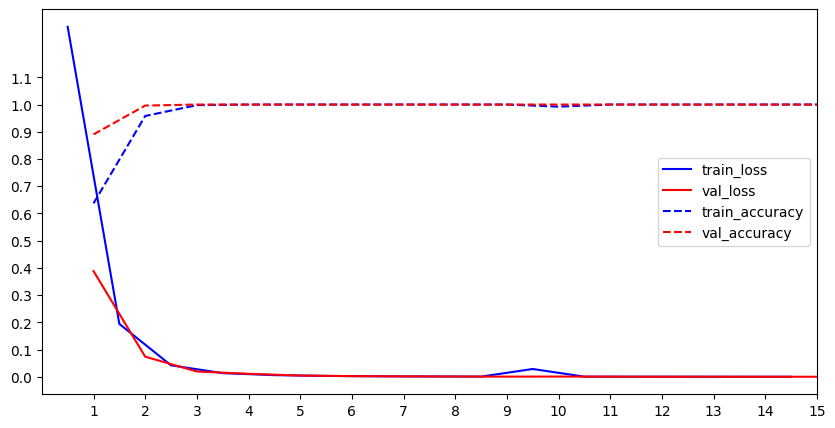

In [45]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

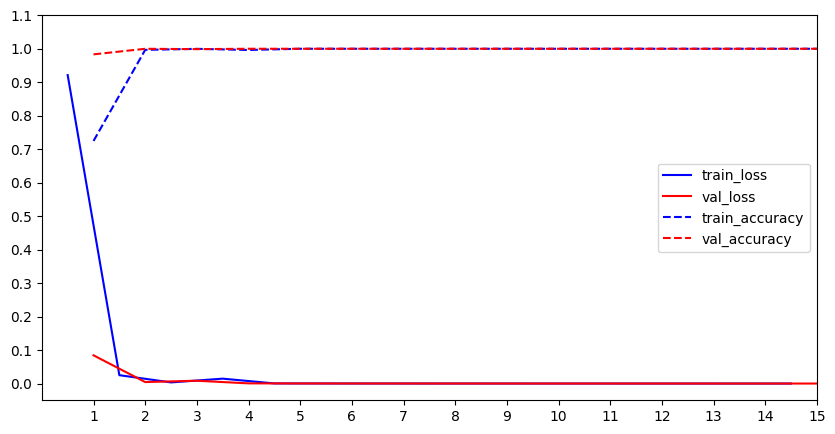

In [46]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

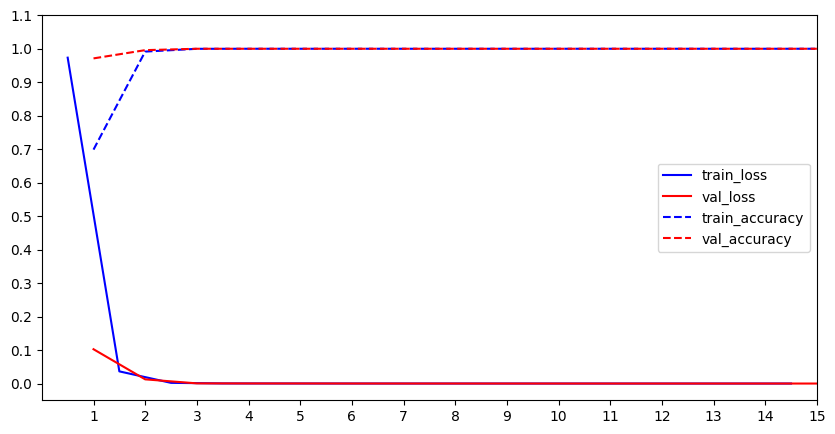

In [47]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

When assessed on the validation dataset, Model 3 showcases the minimal loss.

In [48]:
## Convolutional Filters

# Our existing models come with three pairs of Convolutional layers followed by Pooling layers.

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.3179 - accuracy: 0.5939INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 11s 16ms/step - loss: 1.3172 - accuracy: 0.5941 - val_loss: 0.3259 - val_accuracy: 0.9083
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.1543 - accuracy: 0.9525INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 0.1542 - accuracy: 0.9526 - val_loss: 0.0899 - val_accuracy: 0.9700
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9908INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 0.0383 - accuracy: 0.9908 - val_loss: 0.0077 - val_accuracy: 0.9996
Epoch 4/10
610/610 [==============================] - 9s 14ms/step - loss: 0.0339 - accuracy: 0.9912 - val_loss: 0.0112 - val_accuracy: 0.9977
Epoch 5/10
607/610 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.0594e-04 - val_accuracy: 1.0000
Epoch 6/10
610/610 [==============================] - ETA: 0s - loss: 4.6091e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 4.6091e-04 - accuracy: 1.0000 - val_loss: 4.3714e-04 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 2.8152e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 2.8132e-04 - accuracy: 1.0000 - val_loss: 2.5879e-04 - val_accuracy: 1.0000
Epoch 8/10
608/610 [============================>.] - ETA: 0s - loss: 1.8144e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 1.8163e-04 - accuracy: 1.0000 - val_loss: 1.7641e-04 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 1.2892e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 1.2880e-04 - accuracy: 1.0000 - val_loss: 1.1915e-04 - val_accuracy: 1.0000
Epoch 10/10
606/610 [============================>.] - ETA: 0s - loss: 8.8054e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-1/assets


INFO:tensorflow:Assets written to: models/fmaps-1/assets


610/610 [==============================] - 10s 16ms/step - loss: 8.7942e-05 - accuracy: 1.0000 - val_loss: 8.8976e-05 - val_accuracy: 1.0000
Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.1964 - accuracy: 0.6256INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 14s 22ms/step - loss: 1.1958 - accuracy: 0.6257 - val_loss: 0.2163 - val_accuracy: 0.9296
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.0880 - accuracy: 0.9745INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 14s 24ms/step - loss: 0.0879 - accuracy: 0.9745 - val_loss: 0.0656 - val_accuracy: 0.9803
Epoch 3/10
608/610 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9924INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 17s 28ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 9.2544e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 15s 25ms/step - loss: 9.2543e-04 - accuracy: 1.0000 - val_loss: 5.6881e-04 - val_accuracy: 1.0000
Epoch 5/10
608/610 [============================>.] - ETA: 0s - loss: 3.8647e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 16s 26ms/step - loss: 3.8646e-04 - accuracy: 1.0000 - val_loss: 4.2252e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 2.3474e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 17s 28ms/step - loss: 2.3472e-04 - accuracy: 1.0000 - val_loss: 2.2734e-04 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 1.5324e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 17s 27ms/step - loss: 1.5313e-04 - accuracy: 1.0000 - val_loss: 1.4979e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 1.0368e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 14s 23ms/step - loss: 1.0368e-04 - accuracy: 1.0000 - val_loss: 1.0986e-04 - val_accuracy: 1.0000
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 6.8289e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 14s 23ms/step - loss: 6.8291e-05 - accuracy: 1.0000 - val_loss: 7.2872e-05 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - ETA: 0s - loss: 4.8555e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-2/assets


INFO:tensorflow:Assets written to: models/fmaps-2/assets


610/610 [==============================] - 16s 27ms/step - loss: 4.8555e-05 - accuracy: 1.0000 - val_loss: 5.4215e-05 - val_accuracy: 1.0000
Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 1.0003 - accuracy: 0.6895INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 23s 36ms/step - loss: 0.9982 - accuracy: 0.6902 - val_loss: 0.0819 - val_accuracy: 0.9814
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.0408 - accuracy: 0.9900INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 22s 36ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 0.0244 - val_accuracy: 0.9942
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9968INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 24s 40ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 22s 37ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 3.0007e-04 - val_accuracy: 1.0000
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 1.8120e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 22s 36ms/step - loss: 1.8116e-04 - accuracy: 1.0000 - val_loss: 1.6216e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.0520e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 24s 40ms/step - loss: 1.0524e-04 - accuracy: 1.0000 - val_loss: 1.0936e-04 - val_accuracy: 1.0000
Epoch 7/10
610/610 [==============================] - ETA: 0s - loss: 6.8249e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 29s 48ms/step - loss: 6.8249e-05 - accuracy: 1.0000 - val_loss: 7.3169e-05 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 4.6779e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 27s 45ms/step - loss: 4.6760e-05 - accuracy: 1.0000 - val_loss: 5.6487e-05 - val_accuracy: 1.0000
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 3.3787e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 25s 40ms/step - loss: 3.3793e-05 - accuracy: 1.0000 - val_loss: 4.0846e-05 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 2.3813e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fmaps-3/assets


INFO:tensorflow:Assets written to: models/fmaps-3/assets


610/610 [==============================] - 22s 36ms/step - loss: 2.3804e-05 - accuracy: 1.0000 - val_loss: 2.9857e-05 - val_accuracy: 1.0000


In [49]:
models[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 32)         

In [50]:
models[1].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 64)         

In [51]:
models[2].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 48)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 3, 96)         

In [52]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 2s 6ms/step - loss: 2.9857e-05 - accuracy: 1.0000


In [53]:
h_2_1 = np.load('models/fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/fmaps-3-history', allow_pickle=True)

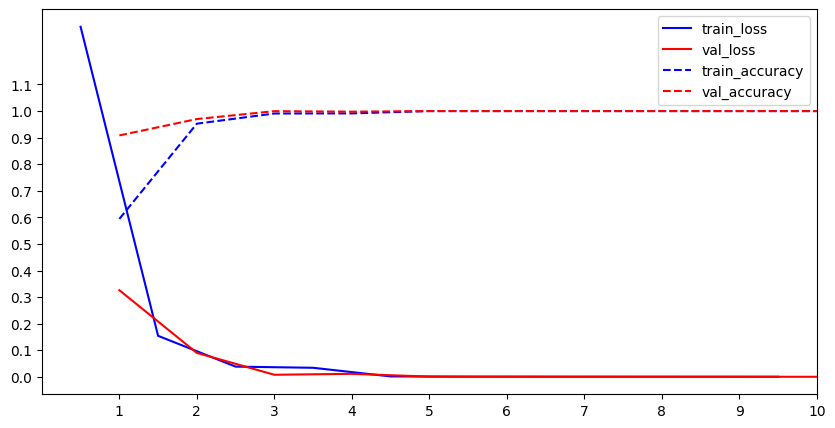

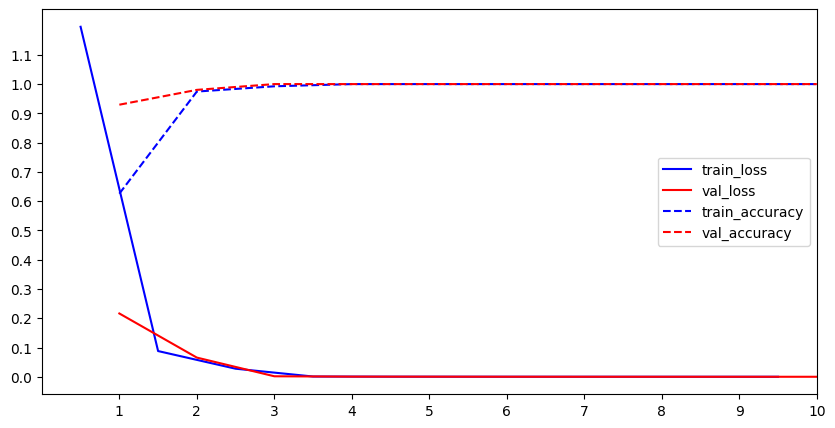

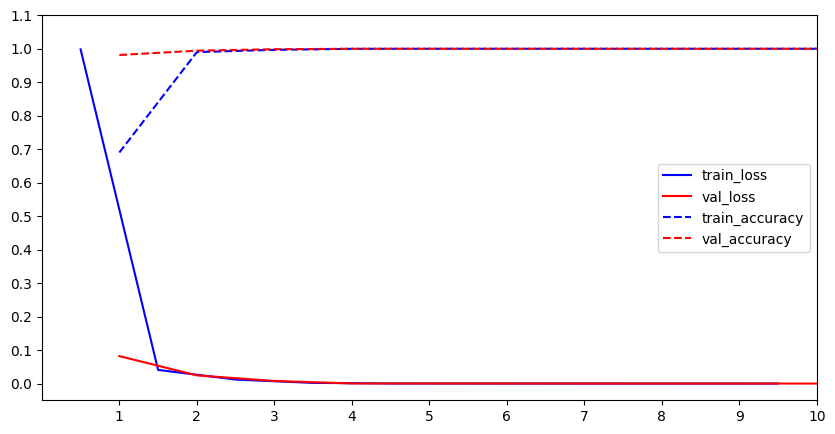

In [54]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3

In [55]:
#Filter Size

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/filters_1_history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 1.2148 - accuracy: 0.6258INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 19ms/step - loss: 1.2125 - accuracy: 0.6266 - val_loss: 0.1850 - val_accuracy: 0.9527
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0949 - accuracy: 0.9722INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.0948 - accuracy: 0.9722 - val_loss: 0.0367 - val_accuracy: 0.9940
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9982INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9990
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9911INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/10
607/610 [============================>.] - ETA: 0s - loss: 9.3638e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 9.3437e-04 - accuracy: 1.0000 - val_loss: 8.0691e-04 - val_accuracy: 1.0000
Epoch 6/10
607/610 [============================>.] - ETA: 0s - loss: 4.1300e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 4.1241e-04 - accuracy: 1.0000 - val_loss: 3.8994e-04 - val_accuracy: 1.0000
Epoch 7/10
607/610 [============================>.] - ETA: 0s - loss: 2.7189e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 2.7109e-04 - accuracy: 1.0000 - val_loss: 2.8105e-04 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 1.6003e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 1.6010e-04 - accuracy: 1.0000 - val_loss: 1.9509e-04 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 1.0770e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 19ms/step - loss: 1.0759e-04 - accuracy: 1.0000 - val_loss: 1.3126e-04 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 1.0596e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/fiters-1/assets


INFO:tensorflow:Assets written to: models/fiters-1/assets


610/610 [==============================] - 12s 20ms/step - loss: 1.0591e-04 - accuracy: 1.0000 - val_loss: 9.8483e-05 - val_accuracy: 1.0000


In [57]:
model = keras.models.load_model('models/fiters-1/')
model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 3ms/step - loss: 9.8483e-05 - accuracy: 1.0000


[9.848290937952697e-05, 1.0]

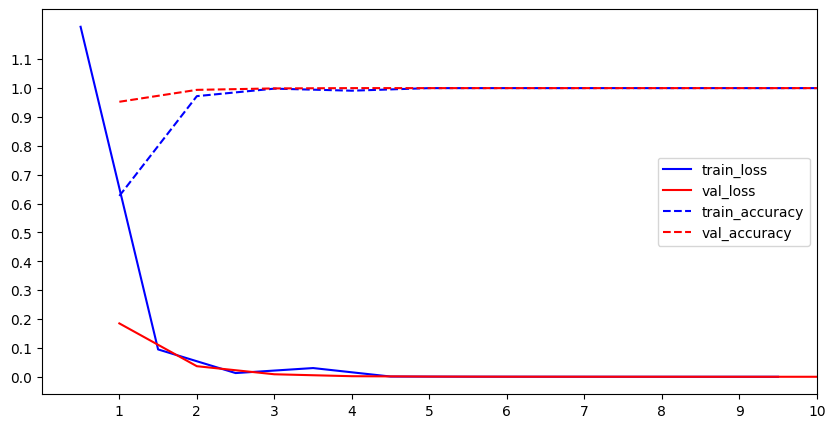

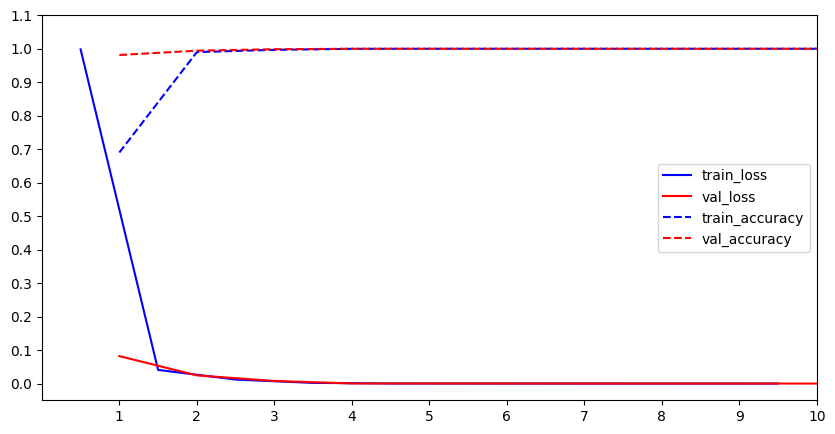

In [63]:
h_2_3 = np.load('models/fmaps-3-history', allow_pickle=True)
h = np.load('models/filters_1_history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

We opt to utilize filter dimensions of (5x5).

In [64]:
# Dropout

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/dropout_{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/dropout_{index}_history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.9034 - accuracy: 0.3942INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 35ms/step - loss: 1.9025 - accuracy: 0.3945 - val_loss: 0.3811 - val_accuracy: 0.8716
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.8450INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 21s 35ms/step - loss: 0.4427 - accuracy: 0.8451 - val_loss: 0.0792 - val_accuracy: 0.9897
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9239INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 35ms/step - loss: 0.2163 - accuracy: 0.9238 - val_loss: 0.0217 - val_accuracy: 0.9962
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9558INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 35ms/step - loss: 0.1323 - accuracy: 0.9557 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.1000 - accuracy: 0.9668INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 35ms/step - loss: 0.1000 - accuracy: 0.9668 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9766INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 35ms/step - loss: 0.0711 - accuracy: 0.9766 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9763INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 21s 35ms/step - loss: 0.0714 - accuracy: 0.9764 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.0638 - accuracy: 0.9797INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 22s 37ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 8.7520e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9842INFO:tensorflow:Assets written to: models/dropout_0/assets


INFO:tensorflow:Assets written to: models/dropout_0/assets


610/610 [==============================] - 26s 42ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 4.3478e-04 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - 26s 43ms/step - loss: 0.0579 - accuracy: 0.9811 - val_loss: 9.7158e-04 - val_accuracy: 1.0000
Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 2.4571 - accuracy: 0.2365INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 26s 41ms/step - loss: 2.4550 - accuracy: 0.2371 - val_loss: 0.8171 - val_accuracy: 0.7719
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.7472 - accuracy: 0.7392INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 22s 36ms/step - loss: 0.7472 - accuracy: 0.7392 - val_loss: 0.1521 - val_accuracy: 0.9686
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.8666INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 24s 40ms/step - loss: 0.3908 - accuracy: 0.8667 - val_loss: 0.0589 - val_accuracy: 0.9903
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.9133INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 27s 45ms/step - loss: 0.2495 - accuracy: 0.9133 - val_loss: 0.0208 - val_accuracy: 0.9976
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.1886 - accuracy: 0.9377INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 26s 43ms/step - loss: 0.1886 - accuracy: 0.9377 - val_loss: 0.0125 - val_accuracy: 0.9997
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.1466 - accuracy: 0.9522INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 25s 41ms/step - loss: 0.1466 - accuracy: 0.9523 - val_loss: 0.0053 - val_accuracy: 0.9997
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.1287 - accuracy: 0.9556INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 24s 39ms/step - loss: 0.1286 - accuracy: 0.9556 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - 23s 38ms/step - loss: 0.1050 - accuracy: 0.9646 - val_loss: 0.0044 - val_accuracy: 0.9999
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9704INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 24s 40ms/step - loss: 0.0893 - accuracy: 0.9704 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9705INFO:tensorflow:Assets written to: models/dropout_1/assets


INFO:tensorflow:Assets written to: models/dropout_1/assets


610/610 [==============================] - 25s 41ms/step - loss: 0.0894 - accuracy: 0.9705 - val_loss: 4.2398e-04 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 2.7284 - accuracy: 0.1628INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 25s 38ms/step - loss: 2.7284 - accuracy: 0.1628 - val_loss: 1.3679 - val_accuracy: 0.6398
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 1.2866 - accuracy: 0.5685INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 23s 37ms/step - loss: 1.2861 - accuracy: 0.5686 - val_loss: 0.4433 - val_accuracy: 0.9027
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.7434 - accuracy: 0.7396INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 25s 41ms/step - loss: 0.7435 - accuracy: 0.7395 - val_loss: 0.2058 - val_accuracy: 0.9684
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.8124INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 25s 41ms/step - loss: 0.5391 - accuracy: 0.8125 - val_loss: 0.1160 - val_accuracy: 0.9804
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8536INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 23s 38ms/step - loss: 0.4250 - accuracy: 0.8535 - val_loss: 0.0718 - val_accuracy: 0.9897
Epoch 6/10
610/610 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8798INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 22s 37ms/step - loss: 0.3442 - accuracy: 0.8798 - val_loss: 0.0557 - val_accuracy: 0.9932
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.3066 - accuracy: 0.8941INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 23s 38ms/step - loss: 0.3065 - accuracy: 0.8942 - val_loss: 0.0368 - val_accuracy: 0.9971
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.9075INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 22s 37ms/step - loss: 0.2774 - accuracy: 0.9075 - val_loss: 0.0250 - val_accuracy: 0.9972
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.9196INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 23s 38ms/step - loss: 0.2423 - accuracy: 0.9196 - val_loss: 0.0138 - val_accuracy: 0.9991
Epoch 10/10
610/610 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9269INFO:tensorflow:Assets written to: models/dropout_2/assets


INFO:tensorflow:Assets written to: models/dropout_2/assets


610/610 [==============================] - 23s 38ms/step - loss: 0.2119 - accuracy: 0.9269 - val_loss: 0.0077 - val_accuracy: 0.9999


In [66]:
for index in range(3):
    model = keras.models.load_model(f'models/dropout_{index}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 5ms/step - loss: 0.0077 - accuracy: 0.9999


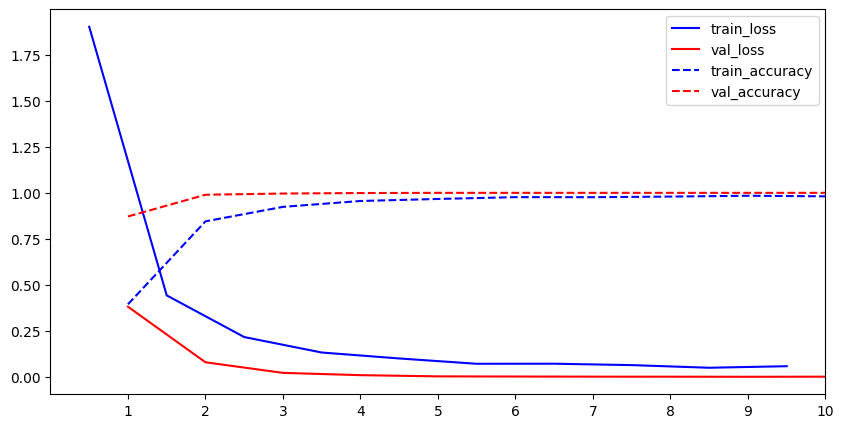

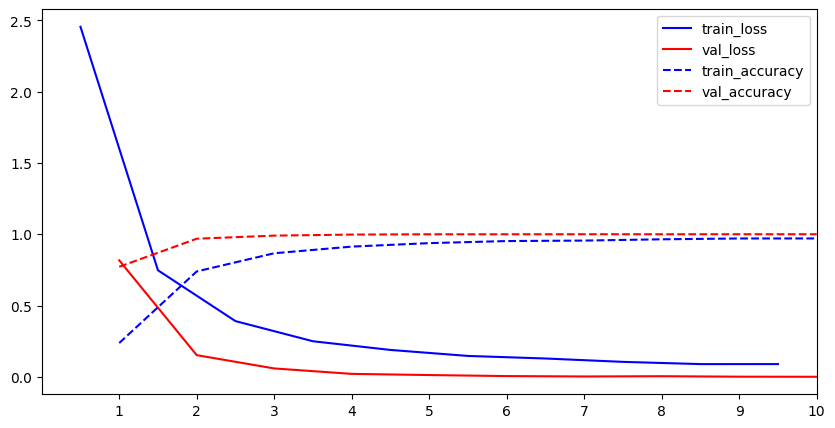

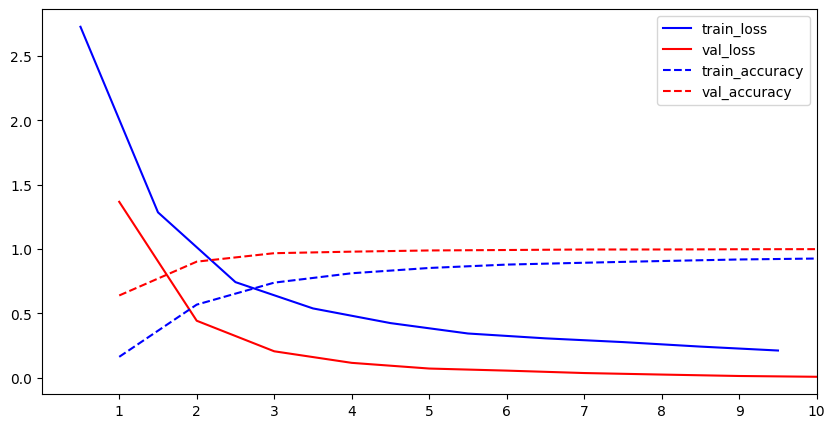

In [67]:
h_0 = np.load('models/dropout_0_history', allow_pickle=True)
h_1 = np.load('models/dropout_1_history', allow_pickle=True)
h_2 = np.load('models/dropout_2_history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Selecting the first model.

 # 25%: Comparison of models, selection of the best two and reporting of final results

In [68]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [69]:
best_model = keras.models.load_model('models/dropout_0/')

In [70]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 5ms/step - loss: 19.0770 - accuracy: 0.9671
Loss: 19.077 Accuracy: 0.967


Accuracy: 96%

In [71]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [72]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [73]:
best_model = keras.models.load_model('models/dropout_0/')

In [74]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 5ms/step - loss: 0.0982 - accuracy: 0.9677
Loss: 0.098 Accuracy: 0.968


Accuracy: 96%